In [38]:
import wfdb
import numpy as np
import pandas as pd
import glob
import os
from scipy.signal import resample

In [39]:
# Code to load all the signals
basePath="ECG_Database"

## List files and folders insade basePath
patDir = sorted(
    [f.path for f in os.scandir(basePath) if f.is_dir()],
    key=lambda x: int(os.path.basename(x).replace("patient", ""))  # Extraer el número de paciente
)

## Dictionary to store each patient's records
patDict = {}

def generateName(i, extension):
        return f"record{i:03d}{extension}" 

for patient in patDir:
    patID=os.path.basename(patient) # patID = directory name
    archivos = os.listdir(patient)

    # Create 3 lists, one for each file type 
    dat = [f for f in archivos if f.endswith(".dat")]
    hea = [f for f in archivos if f.endswith(".hea")]
    xyz = [f for f in archivos if f.endswith(".xyz")]

    # Rename the files for clarity
    
    import os

    # Agrupar los archivos por nombre base y asignarles un número secuencial
    allFiles = []
    
    # Agrupar los archivos con el mismo nombre base
    for f in dat + hea + xyz: 
        allFiles.append(f)  # Asignar el nuevo nombre

    patDict[patID] = {"files": allFiles}


In [40]:
for patient, data in patDict.items():
    print(f"Paciente: {patient}")
    
    # Imprimir los archivos del paciente
    if "files" in data:
        print("Archivos:", ", ".join(data["files"]))
    else:
        print("No hay archivos registrados.")
    
    print("-" * 40)

Paciente: patient001
Archivos: s0010_re.dat, s0016lre.dat, s0014lre.dat, s0016lre.hea, s0014lre.hea, s0010_re.hea, s0016lre.xyz, s0010_re.xyz, s0014lre.xyz
----------------------------------------
Paciente: patient002
Archivos: s0015lre.dat, s0015lre.hea, s0015lre.xyz
----------------------------------------
Paciente: patient003
Archivos: s0017lre.dat, s0017lre.hea, s0017lre.xyz
----------------------------------------
Paciente: patient004
Archivos: s0020are.dat, s0020bre.dat, s0020bre.hea, s0020are.hea, s0020are.xyz, s0020bre.xyz
----------------------------------------
Paciente: patient005
Archivos: s0021are.dat, s0021bre.dat, s0031lre.dat, s0101lre.dat, s0025lre.dat, s0101lre.hea, s0025lre.hea, s0021are.hea, s0031lre.hea, s0021bre.hea, s0031lre.xyz, s0021bre.xyz, s0021are.xyz, s0025lre.xyz, s0101lre.xyz
----------------------------------------
Paciente: patient006
Archivos: s0027lre.dat, s0022lre.dat, s0064lre.dat, s0027lre.hea, s0022lre.hea, s0064lre.hea, s0027lre.xyz, s0064lre.xyz

In [41]:
patient_path = list(patDict.keys())[0]  # Obtener la primera carpeta de paciente
dat_file = os.path.join(patient_path, patDict[patient_path]["files"][0])  # Primer archivo .dat
hea_file = dat_file.replace(".dat", ".hea")  # Archivo .hea correspondiente

print("Ruta del archivo .dat:", dat_file)
print("Ruta del archivo .hea:", hea_file)

Ruta del archivo .dat: patient001/s0010_re.dat
Ruta del archivo .hea: patient001/s0010_re.hea


In [42]:
import os

# Definir basePath y patient_id
basePath = "ECG_Database"
patient_id = "patient001"  # Ajusta esto si es necesario
patient_path = os.path.join(basePath, patient_id)  # Ruta completa

# Tomar el primer archivo válido en "dat"
dat_files = [f for f in patDict[patient_id]["files"] if not f.endswith(":Zone.Identifier")]

if not dat_files:
    raise FileNotFoundError("No se encontraron archivos .dat válidos para este paciente.")

# Construir la ruta completa del archivo .dat
dat_file = os.path.join(patient_path, dat_files[0])
base_path = os.path.splitext(dat_file)[0]  # Eliminar extensión

# Generar los archivos correspondientes
hea_file = os.path.normpath(base_path + ".hea")
xyz_file = os.path.normpath(base_path + ".xyz")

# Verificar si existen los archivos correctos
if os.path.exists(hea_file) and os.path.exists(dat_file):
    print("✅ Los archivos existen correctamente.")
else:
    print(f"❌ No se encontraron los archivos esperados.\n  - {hea_file}\n  - {dat_file}")

✅ Los archivos existen correctamente.


Archivos en patDict[patient001]: ['s0010_re.dat', 's0016lre.dat', 's0014lre.dat', 's0016lre.hea', 's0014lre.hea', 's0010_re.hea', 's0016lre.xyz', 's0010_re.xyz', 's0014lre.xyz']
📂 Leyendo archivo: ECG_Database/patient001/s0010_re


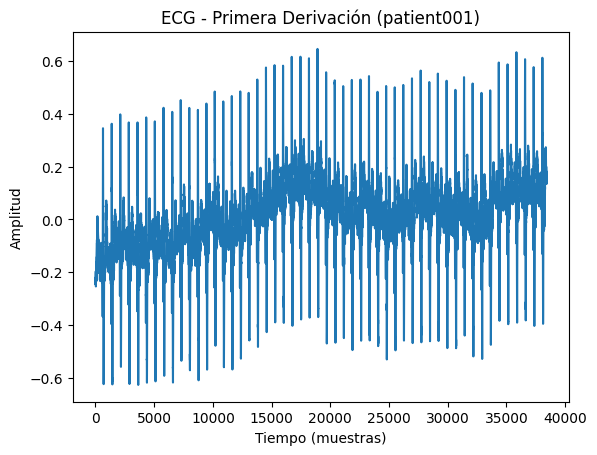

In [43]:
import matplotlib.pyplot as plt
import wfdb
import os

# Seleccionar un paciente y su primer archivo de ECG
basePath = "ECG_Database"
patient_id = "patient001"  # Cambia esto si es necesario
patient_path = os.path.join(basePath, patient_id)  # Ruta completa

# 📌 Verificar los archivos disponibles en patDict
print(f"Archivos en patDict[{patient_id}]:", patDict[patient_id]["files"])

# Filtrar solo archivos que empiecen con "record" y sean .dat
dat_files = [f for f in patDict[patient_id]["files"] if f.endswith(".dat") ]

if not dat_files:
    raise FileNotFoundError(f"❌ No se encontraron archivos .dat válidos en {patient_id}")

# Seleccionar el primer archivo válido
file_path = os.path.join(patient_path, dat_files[0])
file_base = os.path.splitext(file_path)[0]  # Eliminar extensión .dat

print(f"📂 Leyendo archivo: {file_base}")

# Verificar si los archivos existen antes de leer
if not os.path.exists(file_base + ".dat") or not os.path.exists(file_base + ".hea"):
    raise FileNotFoundError(f"⚠️ Falta algún archivo: {file_base}.dat o {file_base}.hea")

# Leer el archivo de ECG
record = wfdb.rdrecord(file_base)

# Extraer la señal
signal = record.p_signal

# Graficar la primera derivación (Lead I)
plt.plot(signal[:, 0])
plt.title(f"ECG - Primera Derivación ({patient_id})")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.show()